### CLV:
In marketing, the CLV is one of the key metrics to have and monitor. The CLV measures customers' total worth to the business over the course of their lifetime relationship with the company. This metric is especially important to keep track of for acquiring new customers. 

There 2 ways to calculate CLV:
- One way is to find the customer's average purchase amount, purchase frequency, and lifetime span and do a simple calculation to get the CLV. e.g. The final CLV amount is calculated by multiplying 500, the average value per month, by 12 months and the lifetime span of 20 years

- CLV can also be estimated through building predictive models

Here is a **regression model** that predicts customers' 3-month CLV

Evaluating regression models:
Four commonly used methodologies to evaluate regression:
- models—mean squared error (MSE)
- median absolute error (MAE)
- R2
- predicted versus actual scatter plot

###### Using a linear regression model to predict CLV (3 month customer value) for a online retailer

In [1]:
%matplotlib inline
# use the %matplotlib inline command to show plots on the Jupyter Notebook
import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_excel('CLV.xlsx', sheet_name='Online Retail')

In [2]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [3]:
# Data clean
    # Handling negative quantity:
df = df.loc[df['Quantity'] > 0]
    # Dropping NaN records
df = df[pd.notnull(df['CustomerID'])]
    # Handling incomplete data
df = df.loc[df['InvoiceDate'] < '2011-12-01']
    # Total sales value
df['Sales'] = df['Quantity'] * df['UnitPrice']

In [4]:
# Summarize this data for each order
orders_df = df.groupby(['CustomerID', 'InvoiceNo']).agg({
            'Sales': sum,
            'InvoiceDate': max})
orders_df

Sales         InvoiceDate
CustomerID InvoiceNo                              
12346.0    541431     77183.60 2011-01-18 10:01:00
12347.0    537626       711.79 2010-12-07 14:57:00
           542237       475.39 2011-01-26 14:30:00
           549222       636.25 2011-04-07 10:43:00
           556201       382.52 2011-06-09 13:01:00
...                        ...                 ...
18283.0    578262       313.65 2011-11-23 13:27:00
           579673       223.61 2011-11-30 12:59:00
18287.0    554065       765.28 2011-05-22 10:39:00
           570715      1001.32 2011-10-12 10:23:00
           573167        70.68 2011-10-28 09:29:00

[17758 rows x 2 columns]

In [5]:
def groupby_mean(x): # computes the average for each group and the second function
    return x.mean()

def groupby_count(x): # counts the number of records in each group
    return x.count()

def purchase_duration(x):
    return (x.max() - x.min()).days # counts the number of days between the first and last invoice dates in each group

def avg_frequency(x):
    return (x.max() - x.min()).days/x.count() # calculates the average number of days between orders


groupby_mean.__name__ = 'avg'
groupby_count.__name__ = 'count'
purchase_duration.__name__ = 'purchase_duration'
avg_frequency.__name__ = 'purchase_frequency'

summary_df = orders_df.reset_index().groupby('CustomerID').agg({
    'Sales': [min, max, sum, groupby_mean, groupby_count],
    'InvoiceDate': [min, max, purchase_duration, avg_frequency]
})


In [6]:
summary_df

Sales                                          \
                 min       max       sum           avg count   
CustomerID                                                     
12346.0     77183.60  77183.60  77183.60  77183.600000   1.0   
12347.0       382.52   1294.32   4085.18    680.863333   6.0   
12348.0       227.44    892.80   1797.24    449.310000   4.0   
12349.0      1757.55   1757.55   1757.55   1757.550000   1.0   
12350.0       334.40    334.40    334.40    334.400000   1.0   
...              ...       ...       ...           ...   ...   
18280.0       180.60    180.60    180.60    180.600000   1.0   
18281.0        80.82     80.82     80.82     80.820000   1.0   
18282.0       100.21    100.21    100.21    100.210000   1.0   
18283.0         1.95    313.65   1886.88    125.792000  15.0   
18287.0        70.68   1001.32   1837.28    612.426667   3.0   

                   InvoiceDate                                        \
                           min                 max purchase_duration   
CustomerID                                                             
12346.0    2011-01-18 10:01:00 2011-01-18 10:01:00                 0   
12347.0    2010-12-07 14:57:00 2011-10-31 12:25:00               327   
12348.0    2010-12-16 19:09:00 2011-09-25 13:13:00               282   
12349.0    2011-11-21 09:51:00 2011-11-21 09:51:00                 0   
12350.0    2011-02-02 16:01:00 2011-02-02 16:01:00                 0   
...                        ...                 ...               ...   
18280.0    2011-03-07 09:52:00 2011-03-07 09:52:00                 0   
18281.0    2011-06-12 10:53:00 2011-06-12 10:53:00                 0   
18282.0    2011-08-05 13:35:00 2011-08-05 13:35:00                 0   
18283.0    2011-01-06 14:14:00 2011-11-30 12:59:00               327   
18287.0    2011-05-22 10:39:00 2011-10-28 09:29:00               158   

                               
           purchase_frequency  
CustomerID                     
12346.0              0.000000  
12347.0             54.500000  
12348.0             70.500000  
12349.0              0.000000  
12350.0              0.000000  
...                       ...  
18280.0              0.000000  
18281.0              0.000000  
18282.0              0.000000  
18283.0             21.800000  
18287.0             52.666667  

[4298 rows x 9 columns]

In [7]:
for col in summary_df.columns:
    print(col)

('Sales', 'min')
('Sales', 'max')
('Sales', 'sum')
('Sales', 'avg')
('Sales', 'count')
('InvoiceDate', 'min')
('InvoiceDate', 'max')
('InvoiceDate', 'purchase_duration')
('InvoiceDate', 'purchase_frequency')


In [8]:
summary_df.columns = ['_'.join(col).lower() for col in summary_df.columns]
summary_df.columns

Index(['sales_min', 'sales_max', 'sales_sum', 'sales_avg', 'sales_count',
       'invoicedate_min', 'invoicedate_max', 'invoicedate_purchase_duration',
       'invoicedate_purchase_frequency'],
      dtype='object')

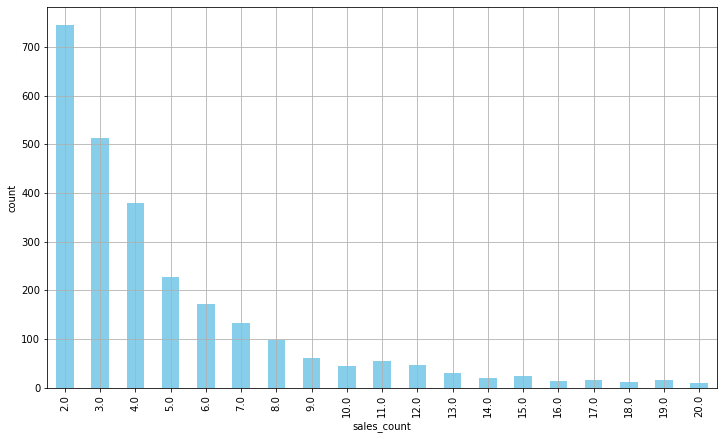

In [9]:
summary_df = summary_df.loc[summary_df['invoicedate_purchase_duration'] > 0]

ax = summary_df.groupby('sales_count').count()['sales_avg'][:20].plot(
    kind='bar', 
    color='skyblue',
    figsize=(12,7), 
    grid=True
)

ax.set_ylabel('count')

plt.show()

# As you can see from this plot, the majority of customers have made 10 or less purchases historically

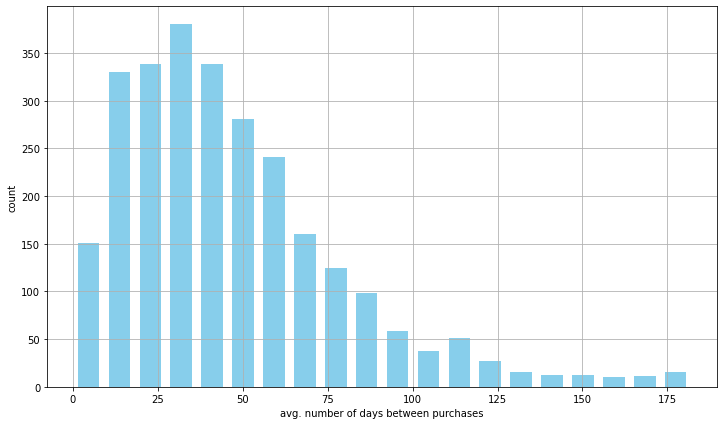

In [10]:
ax = summary_df['invoicedate_purchase_frequency'].hist(
    bins=20,
    color='skyblue',
    rwidth=0.7,
    figsize=(12,7)
)

ax.set_xlabel('avg. number of days between purchases')
ax.set_ylabel('count')

plt.show()

# the majority of repeat customers made purchases every 20 to 50 days

Now, we are going to build a model that predicts the 3 month customer value using the pandas and scikit-learn packages in Python. We are going to first slice the data into chunks of 3 months and take **the last 3 months' data as the target** for predictions and the rest as the features

In [11]:
# Data preparation:
clv_freq = '3M'

data_df = orders_df.reset_index().groupby([
    'CustomerID',
    pd.Grouper(key='InvoiceDate', freq=clv_freq)
]).agg({
    'Sales': [sum, groupby_mean, groupby_count],
})

data_df.columns = ['_'.join(col).lower() for col in data_df.columns]
data_df = data_df.reset_index()
data_df

,CustomerID,InvoiceDate,sales_sum,sales_avg,sales_count
0,12346.0,2011-03-31,77183.60,77183.600000,1.0
1,12347.0,2010-12-31,711.79,711.790000,1.0
2,12347.0,2011-03-31,475.39,475.390000,1.0
3,12347.0,2011-06-30,1018.77,509.385000,2.0
4,12347.0,2011-09-30,584.91,584.910000,1.0
...,...,...,...,...,...
9215,18283.0,2011-06-30,524.68,131.170000,4.0
9216,18283.0,2011-09-30,278.09,92.696667,3.0
9217,18283.0,2011-12-31,766.21,153.242000,5.0
9218,18287.0,2011-06-30,765.28,765.280000,1.0


Since we want to predict the 3 month customer value, we are **breaking down the data into chunks of 3 months for each customer**. As you can see in the groupby function, we group the previously built DataFrame orders_df by CustomerID and a custom Grouper, which groups InvoiceDate by every 3 months. Then, for each group of 3 month time windows, we sum up all of the sales to get the total purchase amount, take the average of purchase amount and the total number of purchases for the given period for each customer

In [12]:
# Encode the InvoiceDate column values so that they are easier to read
date_month_map = {
    str(x)[:10]: 'M_%s' % (i+1) for i, x in enumerate(
        sorted(data_df.reset_index()['InvoiceDate'].unique(), reverse=True)
    )
}

data_df['M'] = data_df['InvoiceDate'].apply(lambda x: date_month_map[str(x)[:10]])
data_df

# As you can see from this code, we are encoding date values into M_1, M_2, M_3, and so forth

,CustomerID,InvoiceDate,sales_sum,sales_avg,sales_count,M
0,12346.0,2011-03-31,77183.60,77183.600000,1.0,M_4
1,12347.0,2010-12-31,711.79,711.790000,1.0,M_5
2,12347.0,2011-03-31,475.39,475.390000,1.0,M_4
3,12347.0,2011-06-30,1018.77,509.385000,2.0,M_3
4,12347.0,2011-09-30,584.91,584.910000,1.0,M_2
...,...,...,...,...,...,...
9215,18283.0,2011-06-30,524.68,131.170000,4.0,M_3
9216,18283.0,2011-09-30,278.09,92.696667,3.0,M_2
9217,18283.0,2011-12-31,766.21,153.242000,5.0,M_1
9218,18287.0,2011-06-30,765.28,765.280000,1.0,M_3


As briefly mentioned before, we are going to use the last 3 months as the target variable and the rest as the features, meaning we are going to train a machine learning model that predicts the last 3 months' customer value with the rest of the data. In order to train such a model, we need to **transform this data into tabular data**, where the rows represent the individual customers and the columns represent each feature

In [13]:
features_df = pd.pivot_table(
    data_df.loc[data_df['M'] != 'M_1'], 
    values=['sales_sum', 'sales_avg', 'sales_count'], 
    columns='M', 
    index='CustomerID'
)

features_df.columns = ['_'.join(col) for col in features_df.columns]
features_df


,sales_avg_M_2,sales_avg_M_3,sales_avg_M_4,sales_avg_M_5,sales_count_M_2,sales_count_M_3,sales_count_M_4,sales_count_M_5,sales_sum_M_2,sales_sum_M_3,sales_sum_M_4,sales_sum_M_5
CustomerID,,,,,,,,,,,,
12346.0,NaN,NaN,77183.600000,NaN,NaN,NaN,1.0,NaN,NaN,NaN,77183.60,NaN
12347.0,584.910000,509.385,475.390000,711.79,1.0,2.0,1.0,1.0,584.91,1018.77,475.39,711.79
12348.0,310.000000,367.000,227.440000,892.80,1.0,1.0,1.0,1.0,310.00,367.00,227.44,892.80
12350.0,NaN,NaN,334.400000,NaN,NaN,NaN,1.0,NaN,NaN,NaN,334.40,NaN
12352.0,316.250000,NaN,312.362000,NaN,2.0,NaN,5.0,NaN,632.50,NaN,1561.81,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
18280.0,NaN,NaN,180.600000,NaN,NaN,NaN,1.0,NaN,NaN,NaN,180.60,NaN
18281.0,NaN,80.820,NaN,NaN,NaN,1.0,NaN,NaN,NaN,80.82,NaN,NaN
18282.0,100.210000,NaN,NaN,NaN,1.0,NaN,NaN,NaN,100.21,NaN,NaN,NaN


In [14]:
# encode these NaN values with 0.0
features_df = features_df.fillna(0)
features_df

,sales_avg_M_2,sales_avg_M_3,sales_avg_M_4,sales_avg_M_5,sales_count_M_2,sales_count_M_3,sales_count_M_4,sales_count_M_5,sales_sum_M_2,sales_sum_M_3,sales_sum_M_4,sales_sum_M_5
CustomerID,,,,,,,,,,,,
12346.0,0.000000,0.000,77183.600000,0.00,0.0,0.0,1.0,0.0,0.00,0.00,77183.60,0.00
12347.0,584.910000,509.385,475.390000,711.79,1.0,2.0,1.0,1.0,584.91,1018.77,475.39,711.79
12348.0,310.000000,367.000,227.440000,892.80,1.0,1.0,1.0,1.0,310.00,367.00,227.44,892.80
12350.0,0.000000,0.000,334.400000,0.00,0.0,0.0,1.0,0.0,0.00,0.00,334.40,0.00
12352.0,316.250000,0.000,312.362000,0.00,2.0,0.0,5.0,0.0,632.50,0.00,1561.81,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...
18280.0,0.000000,0.000,180.600000,0.00,0.0,0.0,1.0,0.0,0.00,0.00,180.60,0.00
18281.0,0.000000,80.820,0.000000,0.00,0.0,1.0,0.0,0.0,0.00,80.82,0.00,0.00
18282.0,100.210000,0.000,0.000000,0.00,1.0,0.0,0.0,0.0,100.21,0.00,0.00,0.00


In [15]:
# Build the target variables
response_df = data_df.loc[
    data_df['M'] == 'M_1',
    ['CustomerID', 'sales_sum']
]

response_df.columns = ['CustomerID', 'CLV_'+clv_freq]

response_df

# Taking the last 3 month period, the M_1 group, as the target variable. 
# The target column will be sales_sum, as we want to predict the next 3 month customer value, 
# which is the total purchase amount that a given customer is likely to make in the next 3 months

,CustomerID,CLV_3M
5,12347.0,1294.32
10,12349.0,1757.55
14,12352.0,311.73
20,12356.0,58.35
21,12357.0,6207.67
...,...,...
9207,18274.0,175.92
9208,18276.0,335.86
9209,18277.0,110.38
9217,18283.0,766.21


In [16]:
# combine features and response data together to build a model
sample_set_df = features_df.merge(
    response_df, 
    left_index=True, # Use the index from the left DataFrame as the join key(s)
    right_on='CustomerID',
    how='left'
)

sample_set_df = sample_set_df.fillna(0) #  This is a case where the given customer did not make any purchases in the last 3 months, 
                                       
sample_set_df

,sales_avg_M_2,sales_avg_M_3,sales_avg_M_4,sales_avg_M_5,sales_count_M_2,sales_count_M_3,sales_count_M_4,sales_count_M_5,sales_sum_M_2,sales_sum_M_3,sales_sum_M_4,sales_sum_M_5,CustomerID,CLV_3M
NaN,0.000000,0.000,77183.600000,0.00,0.0,0.0,1.0,0.0,0.00,0.00,77183.60,0.00,12346.0,0.00
5.0,584.910000,509.385,475.390000,711.79,1.0,2.0,1.0,1.0,584.91,1018.77,475.39,711.79,12347.0,1294.32
NaN,310.000000,367.000,227.440000,892.80,1.0,1.0,1.0,1.0,310.00,367.00,227.44,892.80,12348.0,0.00
NaN,0.000000,0.000,334.400000,0.00,0.0,0.0,1.0,0.0,0.00,0.00,334.40,0.00,12350.0,0.00
14.0,316.250000,0.000,312.362000,0.00,2.0,0.0,5.0,0.0,632.50,0.00,1561.81,0.00,12352.0,311.73
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
NaN,0.000000,0.000,180.600000,0.00,0.0,0.0,1.0,0.0,0.00,0.00,180.60,0.00,18280.0,0.00
NaN,0.000000,80.820,0.000000,0.00,0.0,1.0,0.0,0.0,0.00,80.82,0.00,0.00,18281.0,0.00
NaN,100.210000,0.000,0.000000,0.00,1.0,0.0,0.0,0.0,100.21,0.00,0.00,0.00,18282.0,0.00
9217.0,92.696667,131.170,105.966667,0.00,3.0,4.0,3.0,0.0,278.09,524.68,317.90,0.00,18283.0,766.21


In [17]:
# Linear regression:
from sklearn.model_selection import train_test_split

target_var = 'CLV_'+clv_freq
all_features = [x for x in sample_set_df.columns if x not in ['CustomerID', target_var]]

x_train, x_test, y_train, y_test = train_test_split(
    sample_set_df[all_features], 
    sample_set_df[target_var], 
    test_size=0.3
)

In [18]:
# train a model
from sklearn.linear_model import LinearRegression

reg_fit = LinearRegression()
reg_fit.fit(x_train, y_train)

LinearRegression()

In [19]:
# use the intercept_ attribute of the LinearRegression object
reg_fit.intercept_

37.04688489979651

In [20]:
# find the fitted linear regression model's coefficients
reg_fit.coef_

array([ 3.19156274e-01, -5.93815248e-01, -2.58179318e-01,  5.20728804e-02,
        1.20654836e+02,  9.06777787e+00, -8.58814130e+01,  4.05809080e+01,
        1.88592005e-01,  3.71095640e-01,  2.68145640e-01,  3.96168894e-01])

In [21]:
coef=pd.DataFrame(list(zip(all_features,reg_fit.coef_)))
coef.columns= ['features','coef']
coef

,features,coef
0,sales_avg_M_2,0.319156
1,sales_avg_M_3,-0.593815
2,sales_avg_M_4,-0.258179
3,sales_avg_M_5,0.052073
4,sales_count_M_2,120.654836
5,sales_count_M_3,9.067778
6,sales_count_M_4,-85.881413
7,sales_count_M_5,40.580908
8,sales_sum_M_2,0.188592
9,sales_sum_M_3,0.371096


As you can see from this coefficient output, you can easily find which features have negative correlation with the target and which features have positive correlation with the target. For example, the previous 3 month period's average purchase amount, sales_avg_M_2, has negative impacts on the next 3 month customer value. This means that the higher the previous 3 month period's purchase amount is, the lower the next 3 month purchase amount will be.

Using the 3 month customer value prediction output, you can custom-tailor your marketing strategies in different ways. Since you know the expected revenue or purchase amount from individual customers for the next 3 months, you can set a better informed budget for your marketing campaign. It should be set high enough to reach your target customers, but low enough to be below the expected 3 month customer value, so that you can have a positive ROI marketing campaign. 

On the other hand, you can also use these 3 month customer value prediction output values to specifically target these high-value customers for the next 3 months. This can help you to create marketing campaigns with a higher ROI, as those high-value customers, predicted by this model, are likely to bring in more revenue than the others